In [1]:
import pandas as pd 
df1=pd.read_csv("billwerder_schadstoffe_2012-2023.csv")
df2=pd.read_csv("billwerder_wetter_2012-2023.csv")
df=pd.merge(df1, df2, on="Messzeit")
rolling_mean = df['Schwefeldioxid (µg/m3)'].rolling(window=7, min_periods=1).mean()
df['Schwefeldioxid Mittelwert'] = rolling_mean

In [2]:
df_train = df.iloc[:2555,:]
df_val = df.iloc[2555:2920,:]
df_test = df.iloc[2920:,:]

In [3]:
df_train = df_train.dropna()
df_val = df_val.dropna()
df_test = df_test.dropna()

In [4]:
x_train = df_train.drop(columns=['Feinstaub (µg/m3)', 'Messzeit', 'Unnamed: 0_x', 'Stickstoffdioxid (µg/m3)', 'Stickstoffmonoxid (µg/m3)', 'Schwefeldioxid (µg/m3)', 'Unnamed: 0_y'])
y_train = df_train['Schwefeldioxid (µg/m3)']
x_val = df_train.drop(columns=['Feinstaub (µg/m3)', 'Messzeit', 'Unnamed: 0_x', 'Stickstoffdioxid (µg/m3)', 'Stickstoffmonoxid (µg/m3)', 'Schwefeldioxid (µg/m3)', 'Unnamed: 0_y'])
y_val = df_train['Schwefeldioxid (µg/m3)']
x_test = df_test.drop(columns=['Feinstaub (µg/m3)', 'Messzeit', 'Unnamed: 0_x', 'Stickstoffdioxid (µg/m3)', 'Stickstoffmonoxid (µg/m3)', 'Schwefeldioxid (µg/m3)', 'Unnamed: 0_y'])
y_test = df_test['Schwefeldioxid (µg/m3)']

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_history(metrics):
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("RMSE")

In [6]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense
from tensorflow.keras.callbacks import EarlyStopping
earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=10
    )

def create_nn(neurons=100):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(6,)))
    model.add(Dense(neurons, 'relu'))
    model.add(Dense(neurons//2, 'relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
    return model

2023-06-29 13:57:41.411938: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
param_grid = {
    'batch_size': [8, 16, 32],

}

In [8]:
model = KerasRegressor(build_fn=create_nn, verbose=2)

In [9]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

In [10]:
grid_result = grid_search.fit(x_train, y_train, validation_data=(x_val, y_val), callbacks=[earlystopper])

/home/b/b382492/.conda/envs/env-name/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


199/199 - 1s - loss: 8.9479 - root_mean_squared_error: 2.9913 - val_loss: 407.4532 - val_root_mean_squared_error: 20.1855 - 1s/epoch - 5ms/step
100/100 - 0s - 95ms/epoch - 951us/step


/home/b/b382492/.conda/envs/env-name/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


199/199 - 1s - loss: 7.8848 - root_mean_squared_error: 2.8080 - val_loss: 343.7696 - val_root_mean_squared_error: 18.5410 - 874ms/epoch - 4ms/step
100/100 - 0s - 92ms/epoch - 921us/step


/home/b/b382492/.conda/envs/env-name/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


199/199 - 1s - loss: 7.9602 - root_mean_squared_error: 2.8214 - val_loss: 229.1874 - val_root_mean_squared_error: 15.1389 - 863ms/epoch - 4ms/step
100/100 - 0s - 80ms/epoch - 805us/step


/home/b/b382492/.conda/envs/env-name/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


100/100 - 1s - loss: 9.7288 - root_mean_squared_error: 3.1191 - val_loss: 4162.4448 - val_root_mean_squared_error: 64.5170 - 767ms/epoch - 8ms/step
50/50 - 0s - 61ms/epoch - 1ms/step


/home/b/b382492/.conda/envs/env-name/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


100/100 - 1s - loss: 9.9316 - root_mean_squared_error: 3.1514 - val_loss: 3858.9573 - val_root_mean_squared_error: 62.1205 - 760ms/epoch - 8ms/step
50/50 - 0s - 60ms/epoch - 1ms/step


/home/b/b382492/.conda/envs/env-name/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


100/100 - 1s - loss: 11.9564 - root_mean_squared_error: 3.4578 - val_loss: 3841.7031 - val_root_mean_squared_error: 61.9815 - 758ms/epoch - 8ms/step
50/50 - 0s - 61ms/epoch - 1ms/step


/home/b/b382492/.conda/envs/env-name/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


50/50 - 1s - loss: 12.6084 - root_mean_squared_error: 3.5508 - val_loss: 22258.9492 - val_root_mean_squared_error: 149.1943 - 722ms/epoch - 14ms/step
25/25 - 0s - 51ms/epoch - 2ms/step


/home/b/b382492/.conda/envs/env-name/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


50/50 - 1s - loss: 12.7530 - root_mean_squared_error: 3.5711 - val_loss: 17911.2051 - val_root_mean_squared_error: 133.8327 - 693ms/epoch - 14ms/step
25/25 - 0s - 52ms/epoch - 2ms/step


/home/b/b382492/.conda/envs/env-name/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


50/50 - 1s - loss: 13.6165 - root_mean_squared_error: 3.6901 - val_loss: 27762.1641 - val_root_mean_squared_error: 166.6198 - 703ms/epoch - 14ms/step
25/25 - 0s - 50ms/epoch - 2ms/step


/home/b/b382492/.conda/envs/env-name/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


298/298 - 1s - loss: 7.4718 - root_mean_squared_error: 2.7335 - val_loss: 24.3446 - val_root_mean_squared_error: 4.9340 - 1s/epoch - 4ms/step


In [11]:
print("Best parameters: ", grid_result.best_params_)

Best parameters:  {'batch_size': 8}


In [12]:
history = model.fit(x_train, y_train,
                    batch_size = 8,
                    epochs = 200,
                    validation_data=(x_val, y_val),
                    callbacks=[earlystopper],
                    verbose = 2)

Epoch 1/200


/home/b/b382492/.conda/envs/env-name/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


298/298 - 1s - loss: 7.9948 - root_mean_squared_error: 2.8275 - val_loss: 28.3691 - val_root_mean_squared_error: 5.3263 - 888ms/epoch - 3ms/step
Epoch 2/200
298/298 - 0s - loss: 5.4580 - root_mean_squared_error: 2.3362 - val_loss: 5.0986 - val_root_mean_squared_error: 2.2580 - 303ms/epoch - 1ms/step
Epoch 3/200
298/298 - 0s - loss: 5.1716 - root_mean_squared_error: 2.2741 - val_loss: 4.7160 - val_root_mean_squared_error: 2.1716 - 303ms/epoch - 1ms/step
Epoch 4/200
298/298 - 0s - loss: 4.9887 - root_mean_squared_error: 2.2335 - val_loss: 4.6290 - val_root_mean_squared_error: 2.1515 - 307ms/epoch - 1ms/step
Epoch 5/200
298/298 - 0s - loss: 4.8965 - root_mean_squared_error: 2.2128 - val_loss: 4.2611 - val_root_mean_squared_error: 2.0642 - 306ms/epoch - 1ms/step
Epoch 6/200
298/298 - 0s - loss: 4.6818 - root_mean_squared_error: 2.1637 - val_loss: 4.0950 - val_root_mean_squared_error: 2.0236 - 301ms/epoch - 1ms/step
Epoch 7/200
298/298 - 0s - loss: 4.6820 - root_mean_squared_error: 2.1638 -

In [15]:
plot_history('root_mean_squared_error')

AttributeError: 'KerasRegressor' object has no attribute 'history'

In [16]:
y_train_predicted = model.predict(x_train)
y_test_predicted = model.predict(x_test)

75/75 - 0s - 71ms/epoch - 941us/step
36/36 - 0s - 27ms/epoch - 749us/step


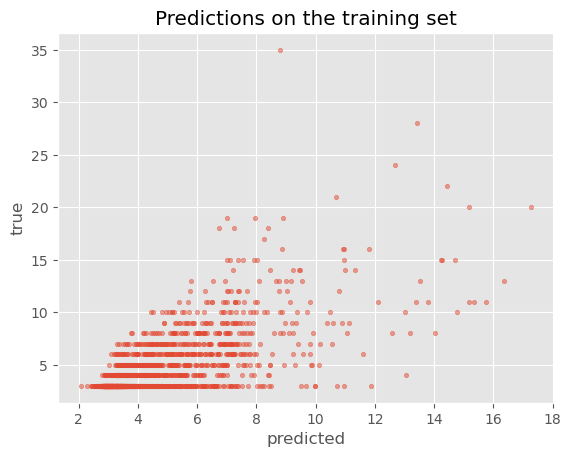

In [17]:
def plot_predictions(y_pred, y_true, title):
    plt.style.use('ggplot') 
    plt.scatter(y_pred, y_true, s=10, alpha=0.5)
    plt.xlabel("predicted")
    plt.ylabel("true")
    plt.title(title)
   

plot_predictions(y_train_predicted, y_train, title='Predictions on the training set')

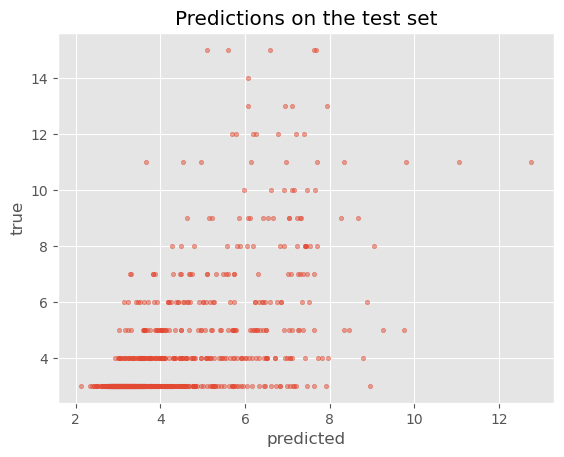

In [18]:
plot_predictions(y_test_predicted, y_test, title='Predictions on the test set')

In [19]:
train_metrics = model.evaluate(x_train, y_train, return_dict=True)
test_metrics = model.evaluate(x_test, y_test, return_dict=True)
print('Train RMSE: {:.2f}, Test RMSE: {:.2f}'.format(train_metrics['root_mean_squared_error'], test_metrics['root_mean_squared_error']))


AttributeError: 'KerasRegressor' object has no attribute 'evaluate'

In [ ]:
x_test

In [ ]:
plot_history(['root_mean_squared_error', 'val_root_mean_squared_error'])
